In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
class PolynomialRegression:
    """
    Polynomial Regression implementation from scratch.
    """
    def __init__(self, degree=2):
        """
        Initialize the polynomial regression model.
        
        Parameters:
        -----------
        degree : int
            The degree of the polynomial (default is 2)
        """
        self.degree = degree
        self.coefficients = None
        
    def _create_polynomial_features(self, X):
        """
        Transform input features into polynomial features.
        
        Parameters:
        -----------
        X : numpy.ndarray
            Input features of shape (n_samples,) or (n_samples, 1)
            
        Returns:
        --------
        numpy.ndarray
            Polynomial features of shape (n_samples, degree+1)
        """
        if X.ndim == 1:
            X = X.reshape(-1, 1)
            
        n_samples, n_features = X.shape
        
        # For simplicity, we'll only handle one feature for polynomial expansion
        if n_features != 1:
            raise ValueError("This implementation only supports one feature for polynomial expansion")
            
        # Create the polynomial features
        X_poly = np.ones((n_samples, self.degree + 1))
        
        for i in range(1, self.degree + 1):
            X_poly[:, i] = X[:, 0] ** i
            
        return X_poly
        
    def fit(self, X, y):
        """
        Fit the polynomial regression model.
        
        Parameters:
        -----------
        X : numpy.ndarray
            Training data of shape (n_samples,) or (n_samples, 1)
        y : numpy.ndarray
            Target values of shape (n_samples,)
            
        Returns:
        --------
        self : object
            Returns self
        """
        # Create polynomial features
        X_poly = self._create_polynomial_features(X)
        
        # Calculate coefficients using the normal equation: θ = (X^T X)^(-1) X^T y
        # This is a closed-form solution for least squares
        X_T = X_poly.T
        self.coefficients = np.linalg.inv(X_T.dot(X_poly)).dot(X_T).dot(y)
        
        return self
        
    def predict(self, X):
        """
        Predict using the polynomial model.
        
        Parameters:
        -----------
        X : numpy.ndarray
            Samples of shape (n_samples,) or (n_samples, 1)
            
        Returns:
        --------
        numpy.ndarray
            Returns predicted values
        """
        if self.coefficients is None:
            raise ValueError("Model has not been fitted yet. Call 'fit' first.")
            
        # Transform input features
        X_poly = self._create_polynomial_features(X)
        
        # Make predictions
        return X_poly.dot(self.coefficients)
    
    def score(self, X, y):
        """
        Calculate the coefficient of determination R^2.
        
        Parameters:
        -----------
        X : numpy.ndarray
            Test samples of shape (n_samples,) or (n_samples, 1)
        y : numpy.ndarray
            True values for X of shape (n_samples,)
            
        Returns:
        --------
        float
            R^2 score
        """
        y_pred = self.predict(X)
        u = ((y - y_pred) ** 2).sum()
        v = ((y - y.mean()) ** 2).sum()
        
        return 1 - (u / v)



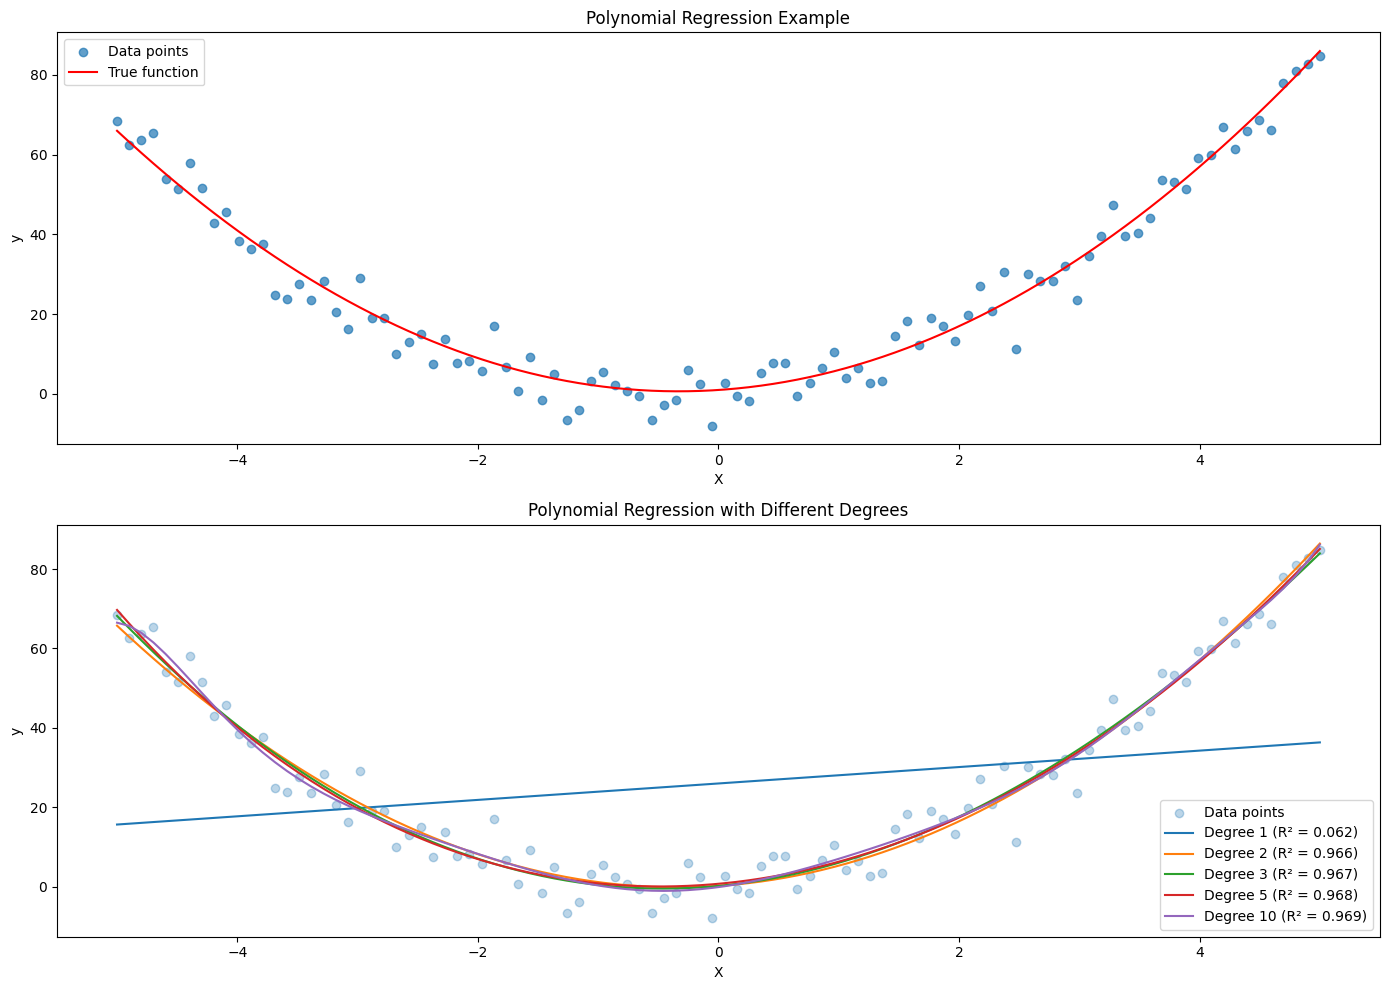

Coefficients for degree 2 model: [0.16917081 2.06896634 3.03665116]


In [3]:
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    X = np.linspace(-5, 5, 100)
    y_true = 1 + 2*X + 3*X**2  # True function: 1 + 2x + 3x^2
    y = y_true + np.random.normal(0, 5, X.shape)  # Add some noise
    
    # Fit polynomial regression models with different degrees
    degrees = [1, 2, 3, 5, 10]
    plt.figure(figsize=(14, 10))
    
    # Sort X and y for plotting
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]
    
    plt.subplot(2, 1, 1)
    plt.scatter(X, y, alpha=0.7, label='Data points')
    plt.plot(X_sorted, y_true[sort_idx], 'r', label='True function')
    plt.title('Polynomial Regression Example')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.scatter(X, y, alpha=0.3, label='Data points')
    
    for degree in degrees:
        model = PolynomialRegression(degree=degree)
        model.fit(X, y)
        y_pred = model.predict(X_sorted)
        r2_score = model.score(X, y)
        
        plt.plot(X_sorted, y_pred, label=f'Degree {degree} (R² = {r2_score:.3f})')
    
    plt.title('Polynomial Regression with Different Degrees')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Print coefficients for the degree 2 model
    degree2_model = PolynomialRegression(degree=2)
    degree2_model.fit(X, y)
    print(f"Coefficients for degree 2 model: {degree2_model.coefficients}")
    # Should be close to [1, 2, 3] which was our true polynomial